<a href="https://colab.research.google.com/github/diegosym/03MAIR-Algoritmos-de-optimizacion/blob/master/AG2/Diego_Cruz_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AG2 - Actividad Guiada 2** <br>
**Diego Mauricio Cruz Hernandez** <br>
**URL:** https://github.com/diegosym/03MAIR-Algoritmos-de-optimizacion/tree/master/AG2

In [0]:
# Decorador para calcular tiempo a la funcion para la cual queremos calcular el tiempo de ejecución 
from time import time
#Función para calcular el tiempo de ejecución
def calcular_tiempo(f):
   
    def wrapper(*args, **kwargs):        
        inicio = time()       
        resultado = f(*args, **kwargs)       
        tiempo = time() - inicio
        print("Tiempo de ejecución para algoritmo: "+str(tiempo))
        return resultado
    
    return wrapper


**Dos puntos más cercanos. Fuerza bruta vs Divide y Vencerás**

In [2]:
import math
import random

N = 100
LISTA_2D = [ (random.randrange(1,N*10), random.randrange(1,N*10))  for _ in range(N) ]
print(LISTA_2D)

[(163, 632), (629, 410), (754, 244), (320, 395), (856, 505), (52, 808), (633, 365), (650, 764), (541, 571), (750, 265), (431, 793), (585, 963), (77, 231), (725, 593), (756, 629), (187, 434), (843, 667), (726, 58), (483, 164), (209, 850), (323, 434), (232, 130), (573, 949), (393, 945), (876, 712), (220, 564), (515, 493), (607, 867), (446, 21), (972, 905), (136, 178), (102, 475), (564, 122), (321, 398), (687, 296), (69, 497), (518, 555), (850, 269), (327, 930), (411, 954), (217, 103), (671, 496), (787, 72), (192, 704), (281, 559), (991, 767), (354, 499), (164, 742), (723, 871), (638, 756), (592, 60), (335, 931), (123, 867), (639, 35), (584, 164), (9, 684), (742, 411), (493, 504), (154, 45), (772, 443), (217, 833), (88, 54), (699, 357), (786, 760), (674, 851), (983, 775), (544, 841), (370, 338), (523, 263), (41, 649), (226, 852), (540, 445), (55, 265), (814, 718), (507, 536), (237, 257), (380, 538), (439, 693), (875, 741), (370, 804), (717, 748), (295, 808), (428, 252), (633, 89), (893, 1

In [3]:
def distancia(A,B):
  if type(A) is int or type(A) is float:
    return abs(B-A)
  else: 
    return math.sqrt(sum([  (A[i]-B[i])**2 for i in range(len(A))  ]))
  

distancia ((1,3),(2,5))

2.23606797749979

In [31]:
#Fuerza Bruta

def distancia_fuerza_bruta(L):
  mejor_distancia = 10000e10
  
  A,B = (),()
  
  for i in range(len(L)):
    for j in range(i+1,len(L)):
      D = distancia (L[i],L[j])
      if D < mejor_distancia:
        A,B = L[i], L[j]
        mejor_distancia = D
  return [A,B]
 
distancia_fuerza_bruta(LISTA_2D)

[(320, 395), (321, 398)]

In [32]:
#Divide y Venceras

def distancia_divide_y_venceras(L):
  #Si hay pocos aplicamos fuerza Bruta 
  if len(L) < 10:
    return distancia_fuerza_bruta(L)
  
  #Dividir en listas grades
  #pivote = sum([ L[i][0] for i in range(len(L))]) / len(L) # Se calcula la media con la primera coordenada para ser usada como pivote
 
  LISTA_IZQ = sorted (L, key=lambda x: x[0] )[:len(L)//2]
  LISTA_DER = sorted (L, key=lambda x: x[0] )[len(L)//2:]
  
  PUNTOS_LISTA_IZQ = distancia_divide_y_venceras(LISTA_IZQ)
  PUNTOS_LISTA_DER = distancia_divide_y_venceras(LISTA_DER)
  
  return distancia_fuerza_bruta(PUNTOS_LISTA_IZQ +  PUNTOS_LISTA_DER)
  
    
@calcular_tiempo
def LANZA(L):
  return distancia_divide_y_venceras(L)
  
SOL = LANZA(LISTA_2D[:1000])
print(SOL)

Tiempo de ejecución para algoritmo: 0.0010013580322265625
[(320, 395), (321, 398)]


Para capturar el tiempo que tarda cada una de nuestras funciones en ejecutarse, utilizaremos el módulo **timeit** de Python. El módulo **timeit** está diseñado para permitir realizar mediciones de tiempos entre plataformas ejecutando funciones en un entorno consistente y utilizando mecanismos de temporización que sean lo más similares posibles entre sistemas operativos.

In [44]:
import timeit # modulo para comparar tiempo entre algoritmos 
import matplotlib.pyplot as plt # modulo para realizar graficas

# Creamos dos objetos Timer que reciben dos parametros. 
# En el primer parametro  primer parámetro pasamos las funciones a los cuales deseamos medir el tiempo.
# En el segundo parámetro importamos las estructuras que python necesita para realizar la prueba.

fuerza_bruta = timeit.Timer("distancia_fuerza_bruta(L)",
                "from __main__ import distancia_fuerza_bruta, L")

divide_y_venceras = timeit.Timer("distancia_divide_y_venceras(L)",
               "from __main__ import distancia_divide_y_venceras,  L")

print("distancia_fuerza_bruta()   distancia_divide_y_venceras()")

list1 = []
list2 = []

# Configuramos un ciclo, para comparar los dos algoritmos, comenzando con listas de 100 que iremos aumentando de 100 en 100 hasta 1000.
# Obtendremos dos listas con cada uno de los tiempos obtenidos en cada iteración 

for i in range(1000,2001,100):
    
    N = i
    L = [ (random.randrange(1,N*10), random.randrange(1,N*10))  for _ in range(N) ]    
    
    dfb = fuerza_bruta.timeit(number=1)
    list1.append(dfb)
    ddv = divide_y_venceras.timeit(number=1)
    list2.append(ddv)
    print("%15.5f, %15.5f" %(dfb,ddv))

    


distancia_fuerza_bruta()   distancia_divide_y_venceras()
        1.03481,         0.01177
        1.25930,         0.01387
        1.46655,         0.01451
        1.74804,         0.01508
        2.00275,         0.01680
        2.32710,         0.01838
        2.67142,         0.02002
        2.98603,         0.02190
        3.33394,         0.02328
        3.68057,         0.02556
        4.08549,         0.02821


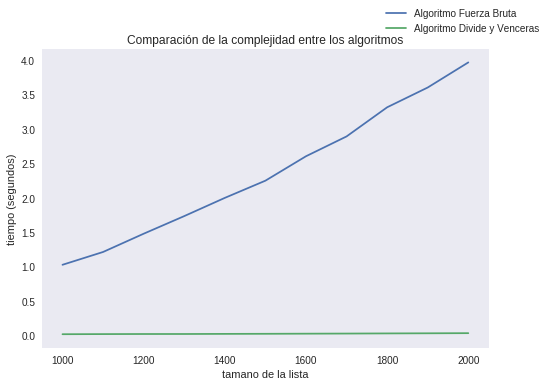

In [43]:
# Con las listas obtenidas en el paso anterior, hacemos un grafica para de manera visual comparar el rendimiento de los dos algoritmos. 

fig, ax = plt.subplots()
p1= ax.plot([i for i in range (1000,2001,100)], list1, label='Algoritmo Fuerza Bruta')
p2= ax.plot([i for i in range (1000,2001,100)], list2, label='Algoritmo Divide y Venceras')

ax.set(xlabel='tamano de la lista', ylabel='tiempo (segundos)',
       title='Comparación de la complejidad entre los algoritmos')
ax.grid()

fig.legend()

plt.show()

**Viaje por el rio. Programación Dinámica**

In [6]:
TARIFAS = [
  [0,5,4,3,999,999,999],
  [999,0,999,2,3,999,11],
  [999,999, 0,1,999,4,10],
  [999,999,999, 0,5,6,9],
  [999,999, 999,999,0,999,4],
  [999,999, 999,999,999,0,3],
  [999,999,999,999,999,999,0]
]

#Viaje por el rio
def Precios(TARIFAS):
  N = len(TARIFAS[0])
  
  PRECIOS = [ [9999]*N for i in [9999]*N ]
  RUTA = [[""]*N for i in [9999]*N ]
  
  #print(PRECIOS)
  #print(RUTA)
  
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i,j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
          MIN = min (MIN , PRECIOS[i][k] + TARIFAS[k][j]  )
          RUTA[i][j] = k
      PRECIOS[i][j] = MIN
      
  return PRECIOS, RUTA
  
  
PRECIOS, RUTA = Precios(TARIFAS)

print(PRECIOS)

print()

print(RUTA)

[[9999, 5, 4, 3, 8, 8, 11], [9999, 9999, 999, 2, 3, 8, 7], [9999, 9999, 9999, 1, 6, 4, 7], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]

[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]


In [7]:
def calcular_ruta(RUTA, desde, hasta ):
  if desde == hasta:
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,0,2,5'